# Import Library

Pada bagian ini kita mengimport library yang digunakan pada proyek.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

Pada bagian ini kita mengakses data yang akan digunakan pada proyek. Dataset ini dapat ditemukan pada https://www.kaggle.com/datasets/abdallahwagih/books-dataset/data.

In [ ]:
df = pd.read_csv('/content/data.csv')

# Data Understanding

Pada bagian ini kita akan melakukan Exploratory Data Analysis (EDA), yang merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

**Deskripsi Variabel**

In [ ]:
# See first five rows of the data columns
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


Menggunakan info dari Kaggle, dataset ini merupakan kumpulan informasi mengenai buku dengan 12 fitur, yaitu:

- isbn13: International Standard Book Number (ISBN) 13 digit, yaitu kode buku yang unik.

- isbn10: ISBN 10 digit untuk buku-buku tersebut.

- title: Judul buku.

- subtitle: Subjudul buku.

- authors: Penulis buku.

- categories: Genre atau kategori buku.

- thumbnail: URL atau tautan ke gambar sampul buku.

- description: Ringkasan singkat atau deskripsi konten setiap buku.

- published_year: Tahun penerbitan buku.

- average_rating: Rating rata-rata buku dari ulasan pembaca, bernilai dari 0 sampai 5.

- num_pages: Jumlah halaman buku.

- ratings_count: Jumlah total ulasan buku.

In [ ]:
# See general info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


Dapat dilihat bahwa terdapat 6810 baris dari 12 kolom data, dengan kebanyakan kolom memiliki data null atau hilang, dan jenis data berupa int64 (1 fitur), object (7 fitur), dan float64 (4 fitur). Berikutnya kita dapat menggunakan describe() untuk melihat statistik dataset.

In [ ]:
# See general statistics of dataset
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


Fungsi describe() memberikan informasi statistik pada kolom numerik, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

**Univariate Analysis**

Menggunakan teknik analisis satu variabel untuk menganalisa data. Pada proyek ini hanya beberapa variabel yang relevan untuk sistem rekomendasi yang akan dianalisa, yaitu authors, categories, average_rating, dan ratings_count.

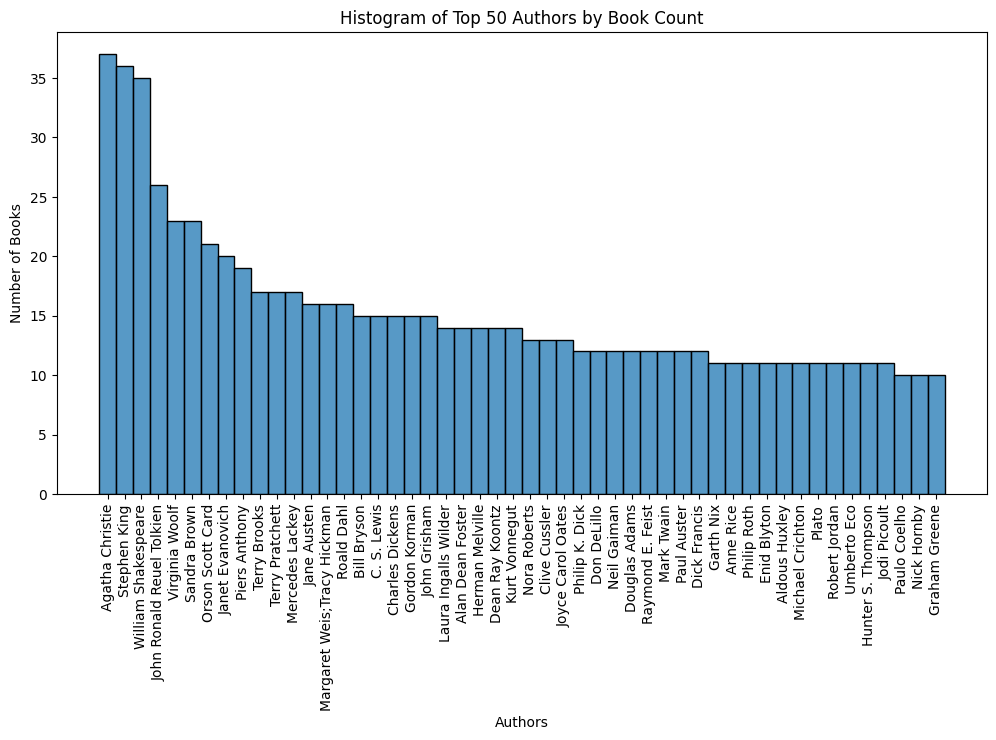

In [ ]:
# Calculate author ranking by book count
author_counts = df['authors'].value_counts()

# Get the top 50 authors
top_50_authors = author_counts.head(50)

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(x=top_50_authors.index, weights=top_50_authors.values, bins=50)
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Histogram of Top 50 Authors by Book Count')
plt.show()


Dapat dilihat bahwa distribusi 50 penulis buku dengan jumlah buku paling banyak didominasi ketiga penulis teratas (Agatha Christie, Stephen King, dan William Shakespeare), dengan mayoritas penulis tidak membuat lebih dari 15 buku.

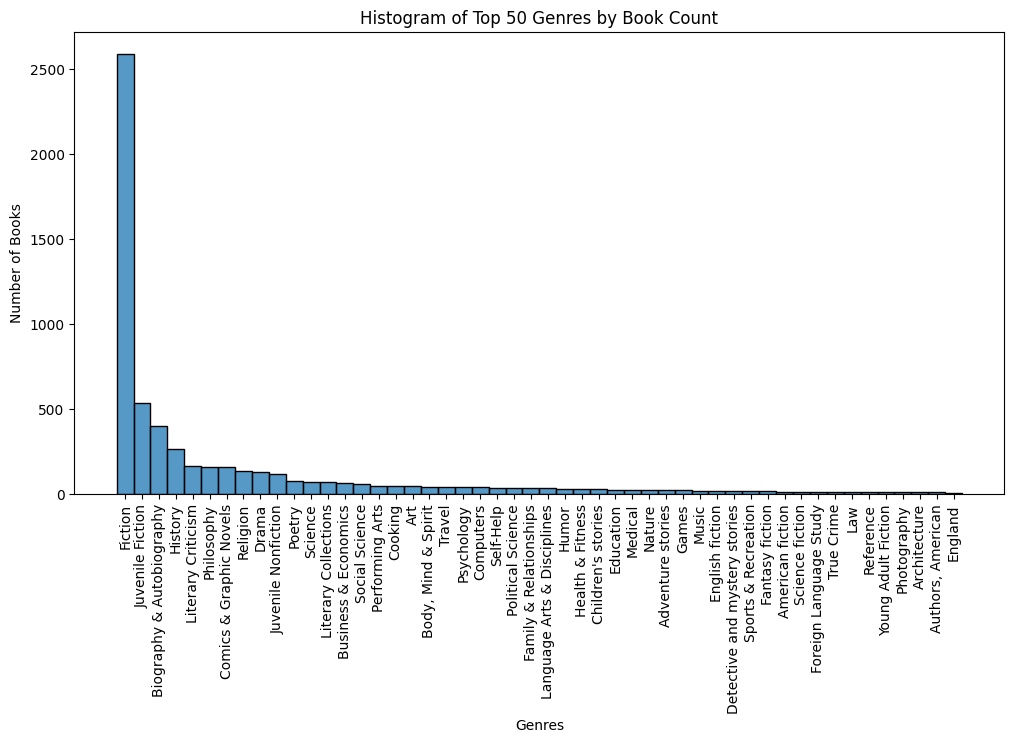

In [ ]:
# Calculate genre ranking by book count
genre_counts = df['categories'].value_counts()

# Get the top 50 genres
top_genres = genre_counts.head(50)

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(x=top_genres.index, weights=top_genres.values, bins=50)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Books')
plt.title('Histogram of Top 50 Genres by Book Count')
plt.show()

Pada distribusi genre, dapat dilihat bahwa mayoritas buku merupakan buku fiksi, dengan Fiction dan Juvenile Fiction menempati hampir setengah dari semua buku. Tentu saja, ini kemungkinan besar karena keduanya merupakan genre dasar yang digabungkan dengan genre lain yang lebih spesifik, seperti Drama, Adventure, atau Mystery.

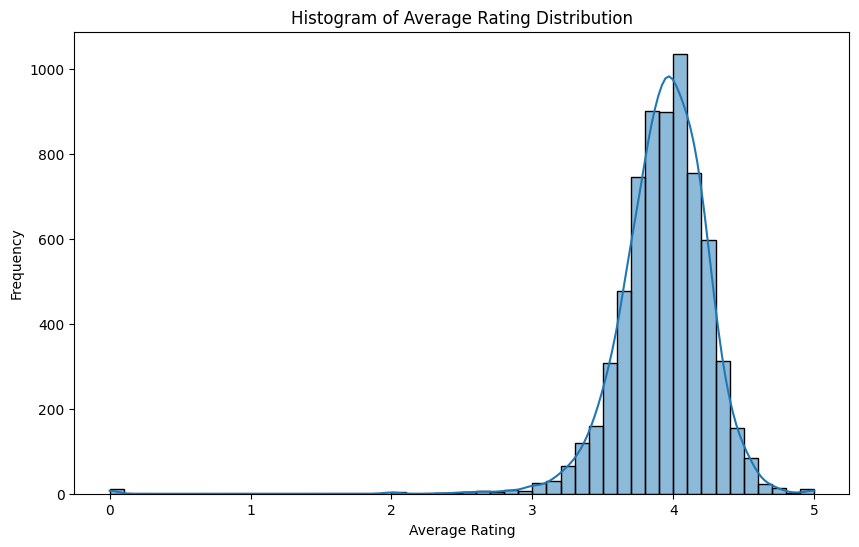

In [ ]:
# Create the histogram for average rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=50, kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Rating Distribution')
plt.show()

Pada distribusi rating, dapat dilihat bahwa distribusi tersebut berbentuk distribusi normal, terpusat pada mean 3.93 seperti terlihat pada df.describe() pada bagian sebelumnya. Terdapat sedikit buku yang memiliki rating kurang dari 3, dengan kenaikan sedikit pada buku dengan rating 0, yang mungkin menandakan rating dari orang yang sangat tidak senang terhadap buku tersebut.

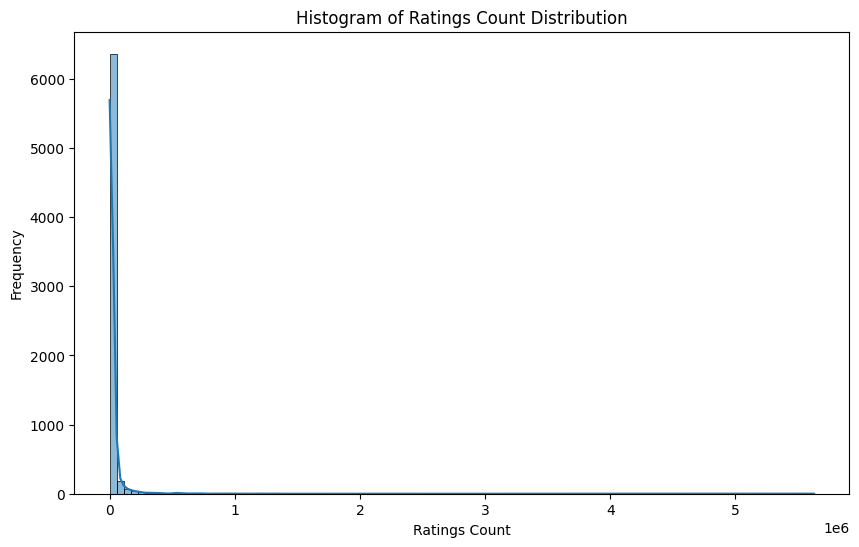

In [ ]:
# Create the histogram for ratings count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings_count'], bins=100, kde=True)
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings Count Distribution')
plt.show()


Terlihat pada grafik distribusi bahwa mayoritas buku memiliki jumlah rating yang rendah, dengan distribusi ekstrim yang menandakan sedikit sekali buku yang memiliki lebih dari 1e6 (1 juta) rating.

# Data Preparation

Data preparation merupakan tahapan penting dalam proses pengembangan model machine learning. Ini adalah tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Pertama, kita akan drop fitur selain variabel yang relevan untuk sistem rekomendasi, yaitu title, subtitle, authors, categories, description, average_rating, dan ratings_count.

In [ ]:
columns = ['title', 'subtitle', 'authors', 'categories', 'description', 'average_rating', 'ratings_count']
df = df[columns]

**Menangani Missing Value**

In [ ]:
# Check for missing values
df.isnull().sum()

,0
title,0
subtitle,4429
authors,72
categories,99
description,262
average_rating,43
ratings_count,43


Seperti dilihat dari df.info(), terdapat missing value, terutama banyak pada subtitle. Karena subtitle hanyalah bagian kedua dari judul, kita akan menyatukan kedua kolom tersebut. Untuk kolom teks lain, kita akan melakukan imputasi data.

In [ ]:
# Combine 'title' and 'subtitle' columns, filling NaN values in 'subtitle' with empty strings
df['title'] = df['title'].fillna('') + ' ' + df['subtitle'].fillna('')

# Drop the original 'subtitle' column
df = df.drop('subtitle', axis=1)

# Fill missing values in 'authors' with 'Author Unknown'
df['authors'] = df['authors'].fillna('Author Unknown')

# Fill missing values in 'description' with 'No description available'
df['description'] = df['description'].fillna('No description available')

# Fill missing values in 'categories' with 'Unknown'
df['categories'] = df['categories'].fillna('Unknown')

# Check for remaining missing values
print(df.isnull().sum())

title              0
authors            0
categories         0
description        0
average_rating    43
ratings_count     43
dtype: int64


<ipython-input-12-cbc62c8a53b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].fillna('') + ' ' + df['subtitle'].fillna('')


Missing value numerik hanya sedikit, dan mungkin membuat informasi salah ketika diimputasi, jadi mereka akan di drop.

In [ ]:
# Drop rows with any remaining missing values
df = df.dropna()

# Check for remaining missing values
print(df.isnull().sum())

title             0
authors           0
categories        0
description       0
average_rating    0
ratings_count     0
dtype: int64


Maka kita telah mengatasi semua missing value pada data yang akan digunakan.


**Menangani Duplikat**

Kita akan memeriksa keberadaan baris duplikat yang menandakan buku sama terisi lebih dari sekali.

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [title, authors, categories, description, average_rating, ratings_count]
Index: []


Maka dapat dilihat tidak ada baris duplikat.


**Normalisasi Data**

Data rating yang berbentuk numerik akan dinormalisasi agar memiliki skala sama dengan cosine similarity untuk sistem rekomendasi hybrid nantinya.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize values
scaler = MinMaxScaler()
df['avg_ratings_scaled'] = scaler.fit_transform(df[['average_rating']])

**Pre-processing Teks**

Selanjutnya kita akan memproses data teks agar mudah digunakan oleh model untuk content-based filtering nantinya. Kita akan membersihkan teks dengan menghilangkan tanda baca, mengubah teks ke huruf kecil, dan menghilangkan stopwords. Kita lalu akan melakukan tokenisasi teks (memecah teks menjadi kata individu atau token) dan stemming (mengubah kata menjadi bentuk dasar).

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = re.split(r';\s*|;', text)  # Split author names by semicolon
    text = ' '.join(text) # Join the names back into a string
    text = re.sub(r'[^\w\s]', '', text).lower()  # Remove punctuation and lowercase
    text = [word for word in text.split() if word not in stopwords.words('english')]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize words
    return ' '.join(text)  # Join the words back into a string

df['processed_author'] = df['authors'].apply(preprocess_text)
df['processed_categories'] = df['categories'].apply(preprocess_text)
df['processed_description'] = df['description'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Kita juga akan menghilangkan whitespace dari depan atau belakang judul, agar lebih mudah digunakan nantinya.

In [ ]:
# Strip leading/trailing whitespaces from titles
df['title'] = df['title'].str.strip()

In [ ]:
df.head()

,title,authors,categories,description,average_rating,ratings_count,avg_ratings_scaled,processed_author,processed_categories,processed_description
0,Gilead,Marilynne Robinson,Fiction,A NOVEL THAT READERS and critics have been eag...,3.85,361.0,0.770,marilynne robinson,fiction,novel reader critic eagerly anticipating decad...
1,Spider's Web A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,A new 'Christie for Christmas' -- a full-lengt...,3.83,5164.0,0.766,charles osborne agatha christie,detective mystery story,new christie christmas fulllength novel adapte...
2,The One Tree,Stephen R. Donaldson,American fiction,Volume Two of Stephen Donaldson's acclaimed se...,3.97,172.0,0.794,stephen r donaldson,american fiction,volume two stephen donaldsons acclaimed second...
3,Rage of angels,Sidney Sheldon,Fiction,"A memorable, mesmerizing heroine Jennifer -- b...",3.93,29532.0,0.786,sidney sheldon,fiction,memorable mesmerizing heroine jennifer brillia...
4,The Four Loves,Clive Staples Lewis,Christian life,Lewis' work on the nature of love divides love...,4.15,33684.0,0.830,clive staple lewis,christian life,lewis work nature love divide love four catego...


Maka dapat dilihat kolom teks yang dibersihkan telah diubah agar mudah digunakan model nantinya.

**Perbaiki Indeks**

Karena tadi dilakukan drop, beberapa kolom data hilang, namun indeks tiap kolom masih tetap sama. Untuk menghindari masalah, indeks akan kita reset agar konsisten dengan jumlah kolom baru.

In [ ]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 0 to 6766
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6767 non-null   object 
 1   authors                6767 non-null   object 
 2   categories             6767 non-null   object 
 3   description            6767 non-null   object 
 4   average_rating         6767 non-null   float64
 5   ratings_count          6767 non-null   float64
 6   avg_ratings_scaled     6767 non-null   float64
 7   processed_author       6767 non-null   object 
 8   processed_categories   6767 non-null   object 
 9   processed_description  6767 non-null   object 
dtypes: float64(3), object(7)
memory usage: 528.8+ KB


Maka dapat dilihat bahwa indeks sudah disesuaikan dengan jumlah baris yang dikurangi.

# Modelling and Results

Modelling and Results adalah tahapan di mana kita menggunakan sistem rekomendasi untuk menjawab problem statement dari tahap business understanding.


Pertama, kita akan menggunakan TF-IDF vectorizer untuk mengekstrak fitur dari data teks yang sudah diproses sebelumnya. TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang umum dan efektif untuk merepresentasikan data teks secara numerik dengan menangkap pentingnya kata-kata dalam suatu dokumen atau korpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer for each feature
author_vectorizer = TfidfVectorizer()
categories_vectorizer = TfidfVectorizer()
description_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizers
author_features = author_vectorizer.fit_transform(df['processed_author'])
categories_features = categories_vectorizer.fit_transform(df['processed_categories'])
description_features = description_vectorizer.fit_transform(df['processed_description'])

Selanjutnya, kita akan menggabungkan fitur-fitur yang sudah kita ekstrak dari data teks menjadi satu vektor.

In [ ]:
from scipy.sparse import hstack

# Concatenate the features horizontally
features = hstack([author_features, categories_features, description_features])

# Convert the sparse matrix to a dense array
features = features.toarray()

Setelah itu, kita akan menghitung Cosine Similarity untuk setiap buku.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all book feature vectors
similarity_matrix = cosine_similarity(features)

Akhirnya, kita akan mendefinisikan fungsi untuk mendapatkan rekomendasi buku berdasarkan penulis, genre buku, dan deskripsi singkat tentang buku tersebut. Kita juga akan menghilangkan white space dari awal dan akhir input judul buku agar sistem rekomendasi tetap bekerja bahkan jika terdapat salah spasi di depan atau belakang judul.

In [ ]:
def get_recommendations(book_title, top_n=10):
    """
    Gets book recommendations using cosine similarity.

    Args:
        book_title (str): The title of the book to get recommendations for.
        top_n (int, optional): The maximum number of recommendations to return.

    Returns:
        list: A list of dictionaries containing the title, author, categories, and description of the recommended books.
    """
    # Strip leading/trailing whitespaces from input book_title
    book_title = book_title.strip()

    # Check if the book title exists in the DataFrame
    if book_title in df['title'].values:
        book_index = df[df['title'] == book_title].index[0]

        # Get the similarity scores for the book
        similarity_scores = similarity_matrix[book_index]

        # Sort the scores in descending order and get the top_n indices
        top_indices = similarity_scores.argsort()[::-1][1:top_n+1]

        # Create list of dictionaries to return later
        recommendations = []
        for index in top_indices:
            book_info = {
                'title': df.loc[index, 'title'],
                'author': df.loc[index, 'authors'],
                'categories': df.loc[index, 'categories'],
                'description': df.loc[index, 'description']
            }
            recommendations.append(book_info)
        return recommendations
    else:
        # Return an empty list if the book title is not found
        print(f"Book '{book_title}' not found in the dataset.")
        return []

Berikutnya, kita akan mencoba fungsi tersebut dengan mencari 10 rekomendasi buku yang paling mirip. Kali ini digunakan buku misteri Agatha Christie, "A Murder is Announced".

In [ ]:
# Test to find 5 most similar books
recommendations = get_recommendations("A Murder is Announced", top_n=10)
for recommendation in recommendations:
    print(f"Title: {recommendation['title']}")
    print(f"Author: {recommendation['author']}")
    print(f"Categories: {recommendation['categories']}")
    print(f"Description: {recommendation['description']}")
    print("---")

Title: Miss Marple The Complete Short Stories
Author: Agatha Christie
Categories: Detective and mystery stories, English
Description: Miss Marple featured in 20 short stories, published in a number of different collections in Britain and America. Presented here in their order of publication, Miss Marple uses her unique insight to deduce the truth about a series of unsolved crimes.
---
Title: The Thirteen Problems
Author: Agatha Christie
Categories: Detective and mystery stories, English
Description: The Tuesday Night Club is a venue where locals challenge Miss Marple to solve recent crimes... One Tuesday evening a group gathers at Miss Marple's house and the conversation turns to unsolved crimes... The case of the disappearing bloodstains; the thief who committed his crime twice over; the message on the death-bed of a poisoned man which read 'heap of fish'; the strange case of the invisible will; a spiritualist who warned that 'Blue Geranium' meant death... Now pit your wits against th

Maka dapat dilihat bahwa novel misteri Agatha Christie menghasilkan rekomendasi buku-buku misteri, dengan buku rekomendasi juga oleh Agatha Christie, menandakan bahwa model dapat mempertimbangkan penulis dan genre seperti diharapkan.

Berikutnya kita akan menggunakan weighted average dari cosine similarity yang sudah dihitung dengan rating rata-rata untuk membuat hybrid recommendation system. Pertama kita akan mendefinisikan bobotnya.

In [ ]:
weight_similarity = 0.7
weight_rating = 0.3

Lalu kita akan membuat fungsi rekomendasi yang sedikit dimodifikasi untuk menggunakan rating dan bobot yang sudah didefinisikan, dan memfilter buku rekomendasi agar mendapatkan buku dengan yang sudah dirating minimal 1000 kali saja.

In [ ]:
def get_recommendations_weighted(book_title, top_n=10):
    """
    Gets book recommendations using a weighted average of cosine similarity and scaled ratings.

    Args:
        book_title (str): The title of the book to get recommendations for.
        top_n (int, optional): The maximum number of recommendations to return.

    Returns:
        list: A list of dictionaries containing the title, author, categories, and description of the recommended books.
    """
    # Strip leading/trailing whitespaces from input book_title
    book_title = book_title.strip()

    # Check if the book title exists in the DataFrame
    if book_title in df['title'].values:
        book_index = df[df['title'] == book_title].index[0]

        # Get the similarity scores for the book
        similarity_scores = similarity_matrix[book_index]

        # Find weighted scores using cosine similarity and ratings
        ratings = df['avg_ratings_scaled'].values
        weighted_scores = (weight_similarity * similarity_scores +
                           weight_rating * ratings)

        # Filter indices based on ratings_count, filtering books with less than 1000 ratings
        filtered_indices = [index for index in weighted_scores.argsort()[::-1][1:]
                             if df.iloc[index, df.columns.get_loc('ratings_count')] >= 1000]

        # Get top indices after filtering
        top_indices = filtered_indices[:top_n]

        # Create list of dictionaries to return
        recommendations = []
        for index in top_indices:
            # Use .iloc to access data based on integer position
            book_info = {
                'title': df.iloc[index, df.columns.get_loc('title')],
                'author': df.iloc[index, df.columns.get_loc('authors')],
                'genre': df.iloc[index, df.columns.get_loc('categories')],
                'description': df.iloc[index, df.columns.get_loc('description')],
            }
            recommendations.append(book_info)

        return recommendations
    else:
        print(f"Book '{book_title}' not found in the dataset.")
        return []

Kita akan mencoba melihat hasil rekomendasi pada buku yang sama seperti tadi.

In [ ]:
recommendations = get_recommendations_weighted("A Murder is Announced", top_n=10)
for recommendation in recommendations:
    print(f"Title: {recommendation['title']}")
    print(f"Author: {recommendation['author']}")
    print(f"Genre: {recommendation['genre']}")
    print(f"Description: {recommendation['description']}")
    print("---")

Title: Miss Marple The Complete Short Stories
Author: Agatha Christie
Genre: Detective and mystery stories, English
Description: Miss Marple featured in 20 short stories, published in a number of different collections in Britain and America. Presented here in their order of publication, Miss Marple uses her unique insight to deduce the truth about a series of unsolved crimes.
---
Title: The Thirteen Problems
Author: Agatha Christie
Genre: Detective and mystery stories, English
Description: The Tuesday Night Club is a venue where locals challenge Miss Marple to solve recent crimes... One Tuesday evening a group gathers at Miss Marple's house and the conversation turns to unsolved crimes... The case of the disappearing bloodstains; the thief who committed his crime twice over; the message on the death-bed of a poisoned man which read 'heap of fish'; the strange case of the invisible will; a spiritualist who warned that 'Blue Geranium' meant death... Now pit your wits against the powers o

Maka bisa dilihat hybrid recommender menghasilkan rekomendasi yang mirip dengan content-based recommender dalam mempertimbangkan penulis dan genre buku, namun menghasilkan rekomendasi yang agak berbeda dengan model yang hanya menggunakan content based filtering.

# Evaluasi Model

Pada tahap ini, kita mengevaluasi model dengan metrik tertentu untuk menilai performanya. Untuk mengevaluasi kedua sistem rekomendasi (content-based dan hybrid), kita akan menggunakan confusion matrix untuk melihat relevansi buku yang direkomendasikan. Kali ini buku relevan akan didefinisikan sebagai buku dengan cosine similarity 0.5 keatas dan rating 3 keatas.

In [ ]:
def evaluate_recommendations(book_title, recommendations, similarity_threshold=0.5, rating_threshold=3):
    """
    Evaluates the recommendations for a given book title.

    Args:
        book_title (str): The title of the book to evaluate recommendations for.
        recommendations (list): A list of dictionaries containing the title, author, categories, and description of the recommended books.
        similarity_threshold (float, optional): The similarity score threshold. Defaults to 0.5.
        rating_threshold (int, optional): The rating threshold. Defaults to 3.

    Returns:
        tuple: A tuple containing the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
    """
    TP = 0  # True Positives
    TN = 0  # True Negatives
    FP = 0  # False Positives
    FN = 0  # False Negatives

    book_index = df[df['title'] == book_title].index[0]  # Get index of the book

    for i, recommendation in enumerate(recommendations):
        recommended_book_title = recommendation['title']
        recommended_book_index = df[df['title'] == recommended_book_title].index[0]

        similarity_score = similarity_matrix[book_index, recommended_book_index]
        rating = df.loc[recommended_book_index, 'average_rating']

        # Check conditions for TP, TN, FP, FN
        if similarity_score >= similarity_threshold and rating >= rating_threshold:
            TP += 1  # Correctly recommended (similar and high rating)
        elif similarity_score < similarity_threshold and rating < rating_threshold:
            TN += 1  # Correctly not recommended (dissimilar and low rating)
        elif similarity_score >= similarity_threshold and rating < rating_threshold:
            FP += 1  # Incorrectly recommended (similar but low rating)
        elif similarity_score < similarity_threshold and rating >= rating_threshold:
            FN += 1  # Incorrectly not recommended (dissimilar but high rating)

    return TP, TN, FP, FN

Kita lalu akan mengevaluasi kedua jenis sistem rekomendasi dan melihat confusion matrix yang dihasilkan.

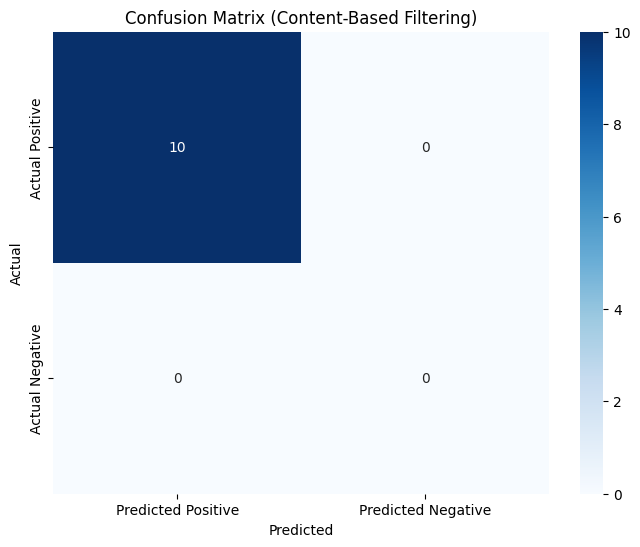

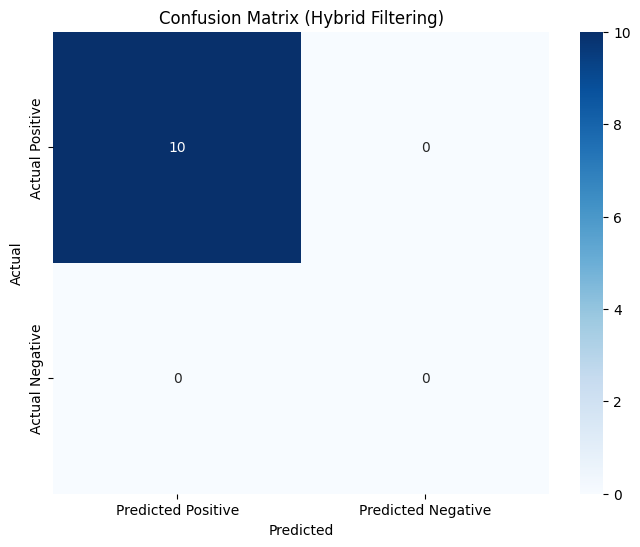

In [ ]:
book_title = "A Murder is Announced"
recommendations = get_recommendations(book_title, top_n=10)
recommendations_weighted = get_recommendations_weighted(book_title, top_n=10)
TP, TN, FP, FN = evaluate_recommendations(book_title, recommendations)
TP_weighted, TN_weighted, FP_weighted, FN_weighted = evaluate_recommendations(book_title, recommendations_weighted)

# Build confusion matrix
confusion_matrix = [[TP, FP], [FN, TN]]
confusion_matrix_weighted = [[TP_weighted, FP_weighted], [FN_weighted, TN_weighted]]

# Confusion Matrix Plot (Content-Based Filtering)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Confusion Matrix (Content-Based Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix Plot (Hybrid Filtering)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_weighted, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Confusion Matrix (Hybrid Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Dapat dilihat dari kedua confusion matrix diatas bahwa kedua sistem rekomendasi telah berhasil merekomendasikan 10 buku yang memiliki cosine similarity minimal 0.5 dan rating minimal 3 secara sempurna, yang menunjukkan bahwa kedua sistem rekomendasi merekomendasikan 10 buku yang mirip dengan buku "A Murder is Announced" dengan rating rata-rata minimal 3, yang kemungkinan besar adalah rekomendasi baik bagi pembaca.

Mari mencoba lagi dengan buku lain, "The Dead Zone" oleh Stephen King, untuk memastikan performa model baik.

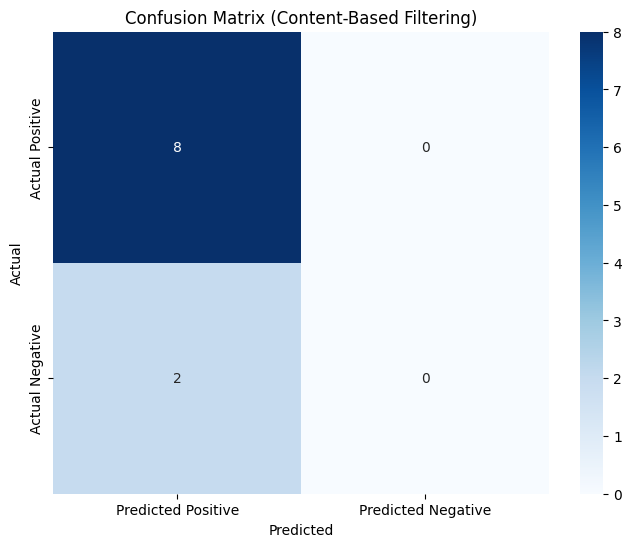

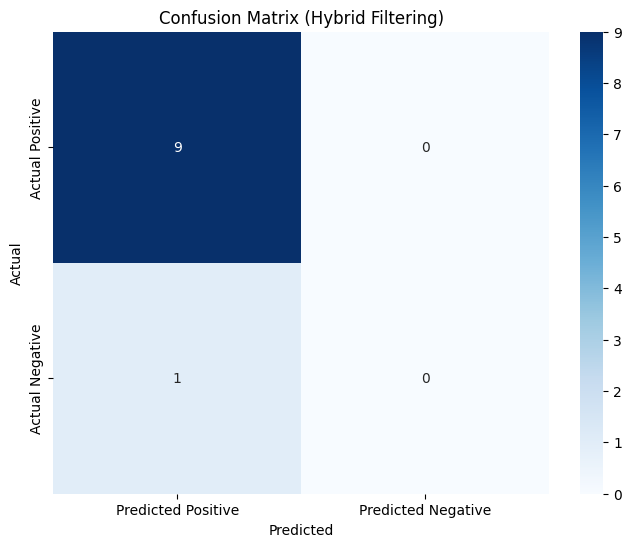

In [ ]:
book_title = "The Dead Zone"
recommendations = get_recommendations(book_title, top_n=10)
recommendations_weighted = get_recommendations_weighted(book_title, top_n=10)
TP, TN, FP, FN = evaluate_recommendations(book_title, recommendations)
TP_weighted, TN_weighted, FP_weighted, FN_weighted = evaluate_recommendations(book_title, recommendations_weighted)

# Build confusion matrix
confusion_matrix = [[TP, FP], [FN, TN]]
confusion_matrix_weighted = [[TP_weighted, FP_weighted], [FN_weighted, TN_weighted]]

# Confusion Matrix Plot (Content-Based Filtering)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Confusion Matrix (Content-Based Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix Plot (Hybrid Filtering)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_weighted, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Confusion Matrix (Hybrid Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Maka dapat dilihat dari kedua confusion matrix diatas bahwa kedua sistem rekomendasi memiliki performa yang baik, dengan content based merekomendasikan 2 false negative, dan hybrid system merekomendasikan 1 false negative, menandakan hybrid recommender dapat lebih menemukan buku relevan karena bobot pada fungsi rekomendasinya.

Ini berarti mayoritas dari 10 buku rekomendasi kedua sistem berupa rekomendasi baik, dengan 2 buku dari content based recommender dan 1 buku dari hybrid recommender berupa rekomendasi yang tidak relevan.

Dari confusion matrix tersebut, kita dapat menghitung metrik precision dan recall.

In [ ]:
def calculate_precision_recall(TP, FP, FN):
    """Calculates precision and recall."""
    if TP + FP == 0:
        precision = 0
    else:
        precision = TP / (TP + FP)

    if TP + FN == 0:
        recall = 0
    else:
        recall = TP / (TP + FN)
    return precision, recall

# Evaluation for "A Murder is Announced"
book_title = "A Murder is Announced"

# Content-based filtering
recommendations = get_recommendations(book_title, top_n=10)
TP, TN, FP, FN = evaluate_recommendations(book_title, recommendations)
precision_content, recall_content = calculate_precision_recall(TP, FP, FN)
print(f"Content-Based Filtering (A Murder is Announced): Precision = {precision_content:.2f}, Recall = {recall_content:.2f}")

# Hybrid filtering
recommendations_weighted = get_recommendations_weighted(book_title, top_n=10)
TP_weighted, TN_weighted, FP_weighted, FN_weighted = evaluate_recommendations(book_title, recommendations_weighted)
precision_hybrid, recall_hybrid = calculate_precision_recall(TP_weighted, FP_weighted, FN_weighted)
print(f"Hybrid Filtering (A Murder is Announced): Precision = {precision_hybrid:.2f}, Recall = {recall_hybrid:.2f}")


# Evaluation for "The Dead Zone"
book_title = "The Dead Zone"

# Content-based filtering
recommendations = get_recommendations(book_title, top_n=10)
TP, TN, FP, FN = evaluate_recommendations(book_title, recommendations)
precision_content, recall_content = calculate_precision_recall(TP, FP, FN)
print(f"Content-Based Filtering (The Dead Zone): Precision = {precision_content:.2f}, Recall = {recall_content:.2f}")

# Hybrid filtering
recommendations_weighted = get_recommendations_weighted(book_title, top_n=10)
TP_weighted, TN_weighted, FP_weighted, FN_weighted = evaluate_recommendations(book_title, recommendations_weighted)
precision_hybrid, recall_hybrid = calculate_precision_recall(TP_weighted, FP_weighted, FN_weighted)
print(f"Hybrid Filtering (The Dead Zone): Precision = {precision_hybrid:.2f}, Recall = {recall_hybrid:.2f}")

Content-Based Filtering (A Murder is Announced): Precision = 1.00, Recall = 1.00
Hybrid Filtering (A Murder is Announced): Precision = 1.00, Recall = 1.00
Content-Based Filtering (The Dead Zone): Precision = 1.00, Recall = 0.80
Hybrid Filtering (The Dead Zone): Precision = 1.00, Recall = 0.90


Precision yang tinggi berarti sistem merekomendasikan buku yang relevan dan menghindari buku yang tidak relevan.

Recall yang tinggi berarti sistem dapat menemukan sebagian besar buku yang relevan.

Dari evaluasi di atas, dapat disimpulkan bahwa kedua sistem rekomendasi kita baik dalam menemukan dan merekomendasikan buku yang relevan bagi pembaca, dengan hybrid recommender menunjukkan performa recall lebih baik pada buku "The Dead Zone".